In [73]:
import pandas as pd

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
data=pd.read_csv('../../data/telecom_churn.csv')

In [76]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [77]:
data.drop(['State', 'Voice mail plan'], axis=1, inplace=True)

In [78]:
data['International plan']=data['International plan'].map({'Yes': 1, 'No': 0})

In [79]:
data.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Churn                     3333 non-null bool
dtypes: bool(1), float64(8), int64(9)
memory usage

In [81]:
y=data['Churn'].astype('int')

In [82]:
X=data.drop('Churn', axis=1)

In [83]:
X.shape, y.shape

((3333, 17), (3333,))

In [84]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [86]:
X_train.shape, X_valid.shape

((2333, 17), (1000, 17))

In [87]:
first_tree=DecisionTreeClassifier(random_state=17)

In [88]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))


0.91427061602227722

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
first_knn=KNeighborsClassifier()

In [91]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.86712740439845226

# Настраиваем максимальную глубину для дерева

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
tree_params={'max_depth': np.arange(1,11), 'max_features':[.5, .7, 1.]}

In [95]:
%%time
tree_grid.fit(X_train, y_train)

CPU times: user 208 ms, sys: 28 ms, total: 236 ms
Wall time: 1.21 s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': [0.5, 0.7, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
tree_grid.best_score_, tree_grid.best_params_

(0.94170595799399914, {'max_depth': 6, 'max_features': 1.0})

In [97]:
knn_params = {'n_neighbors': range(5, 30, 5) }#+ list(range(50, 100, 10))}

In [98]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [99]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: user 2.26 s, sys: 0 ns, total: 2.26 s
Wall time: 2.26 s


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(5, 30, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [100]:
knn_grid.best_score_, knn_grid.best_params_

(0.8701243034719246, {'n_neighbors': 10})

In [101]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [103]:
tree_valid_pred = tree_grid.predict(X_valid)

In [104]:
tree_grid.score(X_valid, y_valid)

0.94599999999999995

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_valid, tree_valid_pred)

0.94599999999999995

In [107]:
from sklearn.tree import export_graphviz

In [108]:
export_graphviz(tree_grid.best_estimator_, out_file='telecom.dot', feature_names=X.columns, filled=True)

In [109]:
!ls -l *.dot

-rw-rw-r-- 1 vmt vmt 8078 сен 24 19:25 telecom.dot


In [110]:
!dot -Tpng telecom.dot -o telecom_tree.png

In [ ]:
<img src='telecom_tree.png'>

In [112]:
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

In [115]:
train_data[:,0]

array([  1.69052570e+00,   3.28201637e-02,  -7.88923029e-01,
        -8.90385858e-04,   1.01765801e+00,  -6.25428974e-01,
         5.05299374e-01,  -2.42749079e-01,   5.54580312e-01,
         2.74459924e-01,   1.65069969e+00,  -3.87139943e-01,
        -4.53860299e-02,  -4.05227855e-01,   1.04939655e+00,
        -7.42553525e-01,  -1.65107559e+00,  -2.06441480e+00,
        -1.20421985e+00,   1.76616088e+00,   8.40733242e-01,
         5.68061887e-01,  -1.70833920e+00,   3.83121852e-01,
         2.69411631e-01,   1.91201886e+00,   1.01433985e-01,
        -1.32377198e-01,  -1.43496347e+00,  -9.47754504e-02,
        -3.68818468e-01,  -9.96106319e-02,  -3.83423123e-01,
        -1.19359192e+00,  -3.00193737e-01,   1.49763912e+00,
         1.08648371e-01,   1.50331852e+00,   3.31974215e-01,
        -1.92855460e-01,   6.54705704e-01,   4.15502614e-01,
        -1.96027312e-01,  -2.99711237e-01,   1.52957963e+00,
         5.48745120e-01,  -1.22421866e-02,  -6.73645187e-01,
         2.25994699e+00,

In [116]:
import matplotlib.pyplot as plt

In [123]:
x=list(range(-10,10))

In [124]:
x

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [135]:
plt.hist(train_data[:,1])

(array([  3.,  11.,   4.,  13.,  16.,  19.,  17.,   9.,   5.,   3.]),
 array([-2.2883151 , -1.83472409, -1.38113307, -0.92754206, -0.47395104,
        -0.02036002,  0.43323099,  0.88682201,  1.34041302,  1.79400404,
         2.24759505]),
 <a list of 10 Patch objects>)

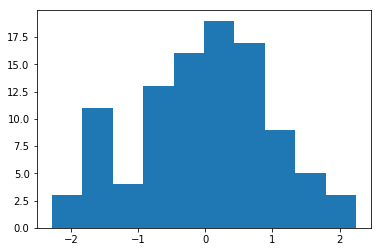

In [136]:
plt.show()

In [137]:
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [138]:
train_data.shape

(200, 2)

In [139]:
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

In [144]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)

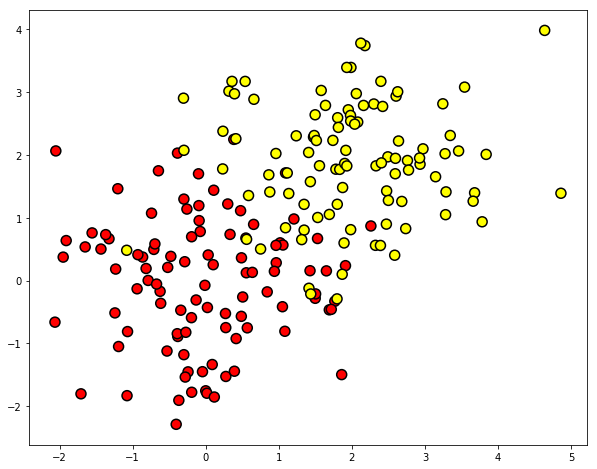

In [145]:
plt.show()

In [142]:
plt.plot(range(-2,5), range(4,-3,-1))

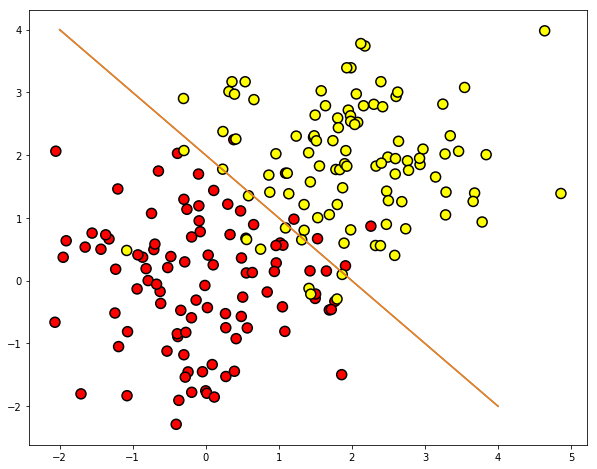

In [143]:
plt.show()

In [146]:
# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)


In [147]:
# обучаем дерево
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [148]:
# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)

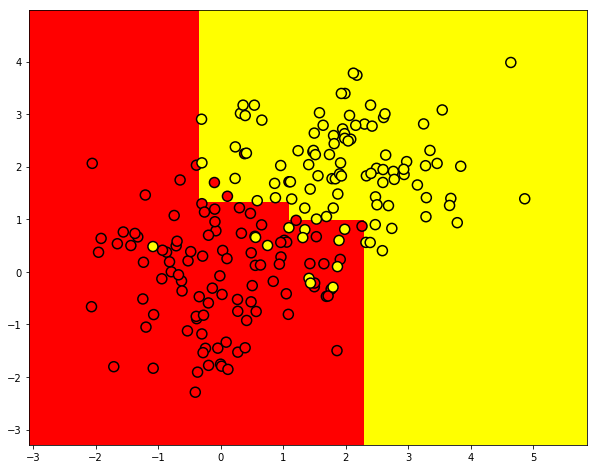

In [149]:
plt.show()

In [150]:
predicted

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

In [151]:
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
                out_file='../../img/small_tree.dot', filled=True)
!dot -Tpng ../../img/small_tree.dot -o ../../img/small_tree.png

In [ ]:
<img src='../../img/small_tree.png'>

In [153]:
data = pd.DataFrame({'Возраст': [17,64,18,20,38,49,55,25,29,31,33], 
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

In [154]:
data.sort_values('Возраст')

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [155]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [156]:
export_graphviz(age_tree, feature_names=['Возраст'], 
                out_file='../../img/age_tree.dot', filled=True)
!dot -Tpng '../../img/age_tree.dot' -o '../../img/age_tree.png'

<img src='../../img/age_tree.png'>

In [157]:
data2 = pd.DataFrame({'Возраст':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Зарплата': [25,80,22,36,37,59,74,70,33,102,88], 
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

In [158]:
data2.sort_values('Возраст')

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [159]:
data2.sort_values('Зарплата')

,Возраст,Зарплата,Невозврат кредита
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [160]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Возраст', 'Зарплата']].values, data2['Невозврат кредита'].values);

In [161]:
export_graphviz(age_sal_tree, feature_names=['Возраст', 'Зарплата'], 
                out_file='../../img/age_sal_tree.dot', filled=True)
!dot -Tpng '../../img/age_sal_tree.dot' -o '../../img/age_sal_tree.png'

<img src='../../img/age_sal_tree.png'>

In [162]:
n_train = 150        
n_test = 1000       
noise = 0.1

In [163]:
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

In [165]:
p = np.array([2,3,1,0])

In [166]:
f(p)

array([ 1.51831564,  0.55194257,  0.9196986 ,  1.02747346])

In [168]:
def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

In [169]:
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [170]:
from sklearn.tree import DecisionTreeRegressor
     
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

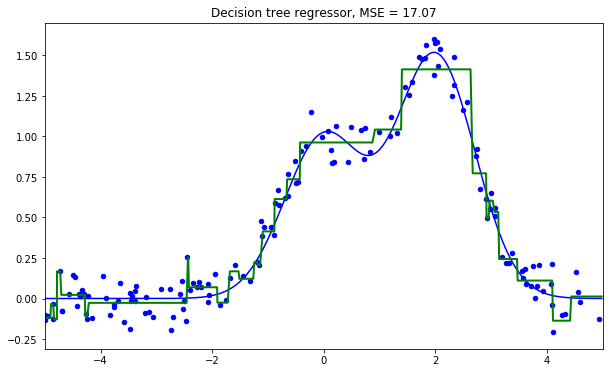

In [190]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()